In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# Récupération du dataframe nettoyé

In [3]:
df = pd.read_csv('train_propre.csv')
#test = pd.read_csv('test_propre.csv')

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1,3,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1,3,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1,3,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1,3,1


In [5]:
#test.head()

In [6]:
X = df.drop(["Loan_Status"], axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1
1,0,1,0,1,1,3000,0.0,66.0,360.0,1,3
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1,3
3,0,0,0,1,0,6000,0.0,141.0,360.0,1,3
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...
494,1,0,0,1,0,2900,0.0,71.0,360.0,1,1
495,0,1,3,1,0,4106,0.0,40.0,180.0,1,1
496,0,1,1,1,0,8072,240.0,253.0,360.0,1,3
497,0,1,2,1,0,7583,0.0,187.0,360.0,1,3


In [7]:
X.shape

(499, 11)

In [8]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
y = df["Loan_Status"]
y

0      0
1      1
2      1
3      1
4      1
      ..
494    1
495    1
496    1
497    1
498    0
Name: Loan_Status, Length: 499, dtype: int64

In [10]:
y.shape

(499,)

# TRAIN/TEST Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

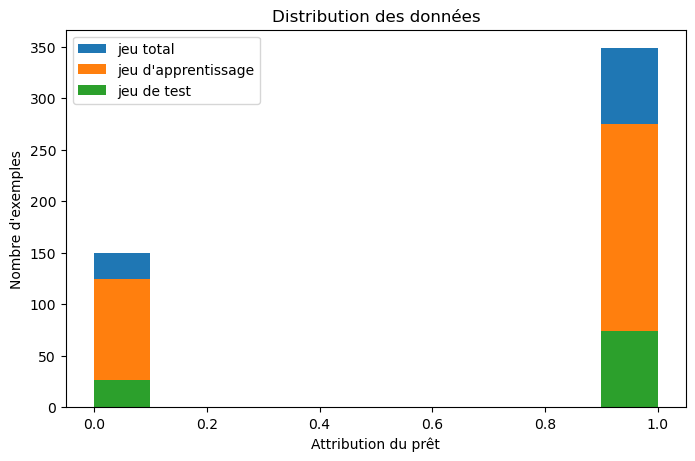

In [12]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.hist(y, label="jeu total")
plt.hist(y_train, label="jeu d'apprentissage")
plt.hist(y_test, label="jeu de test")
plt.xlabel("Attribution du prêt")
plt.ylabel("Nombre d'exemples")
plt.legend()
plt.show()

In [13]:
X_train.shape

(399, 11)

In [14]:
y_train.shape

(399,)

In [15]:
X_test.shape

(100, 11)

In [16]:
y_test.shape

(100,)

# Features Scaling 

 transformer les variables continues en utilsant MinMaxScaler
 
 https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048
 
 https://medium.com/codex/feature-scaling-in-machine-learning-e86b360d1c31

In [17]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [18]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

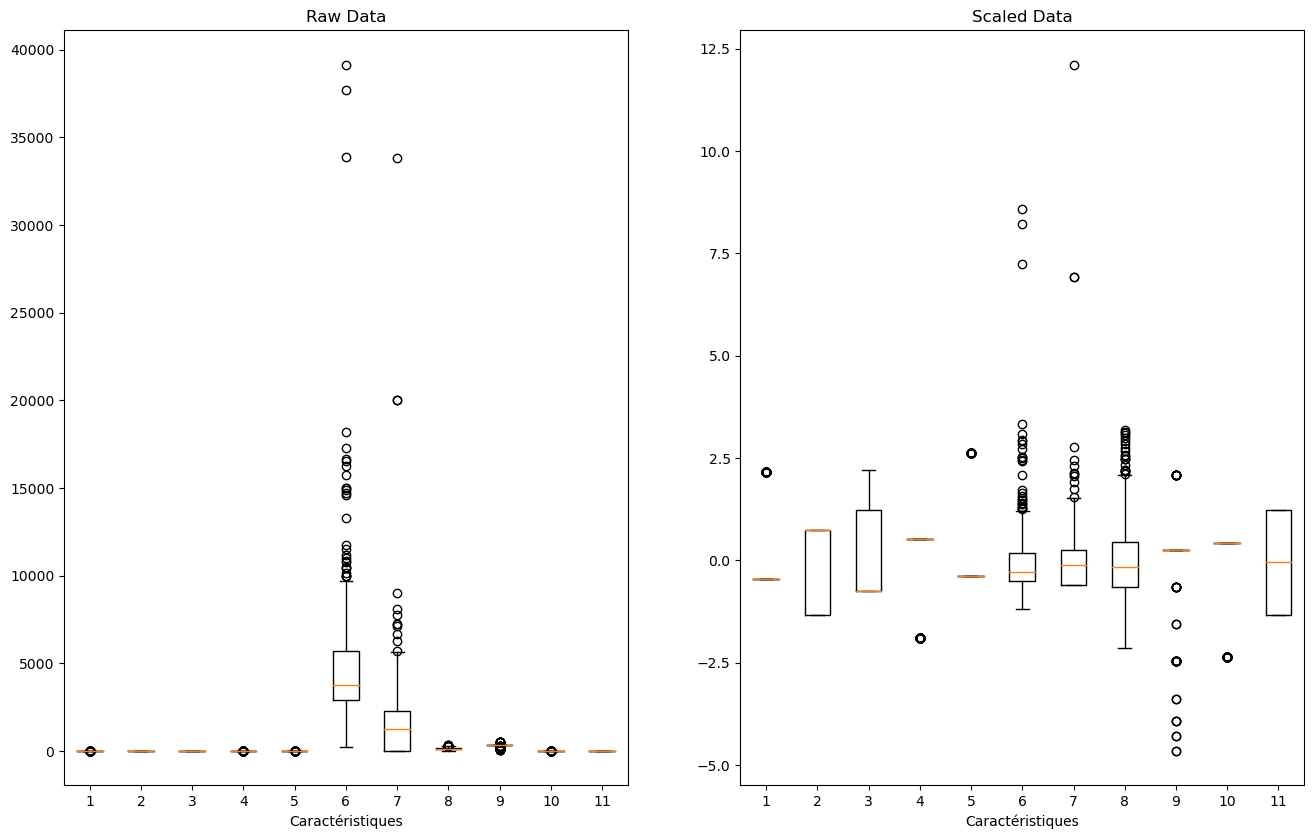

In [19]:
plt.figure(figsize=(16, 10), dpi=100)

plt.subplot(1, 2, 1)
plt.title('Raw Data')
plt.boxplot(X_train)
plt.xlabel('Caractéristiques')

plt.subplot(1, 2, 2)
plt.title('Scaled Data')
plt.boxplot(scaled_X_train)
plt.xlabel('Caractéristiques')

plt.show()

# GridSearchCV MLPClassifier (perceptron)

In [20]:
hyperparameters = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,)], 'activation': ['logistic', 'tanh', 'relu']}

In [21]:
model = MLPClassifier(solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)

In [22]:
gridSearchCV = GridSearchCV(model,
                            hyperparameters,
                            n_jobs=-1,
                            refit=True,
                            cv=3,
                            return_train_score=True,
                            scoring=f1_score)

gridSearchCV.fit(scaled_X_train, y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(max_iter=10000, random_state=0,
                                     solver='lbfgs'),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (3,), (5,), (7,)]},
             return_train_score=True,
             scoring=<function f1_score at 0x000001703A5A45E0>)

In [23]:
gridSearchCV.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (1,)}

In [24]:
pd.DataFrame(gridSearchCV.cv_results_).sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.090326,0.024327,0.007385,0.004722,logistic,"(1,)","{'activation': 'logistic', 'hidden_layer_sizes...",NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,0.132416,0.034007,0.010028,0.012072,logistic,"(3,)","{'activation': 'logistic', 'hidden_layer_sizes...",NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
2,0.143828,0.052974,0.012384,0.006110,logistic,"(5,)","{'activation': 'logistic', 'hidden_layer_sizes...",NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
3,0.357193,0.298230,0.003686,0.002892,logistic,"(7,)","{'activation': 'logistic', 'hidden_layer_sizes...",NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
4,0.050350,0.007937,0.000333,0.000471,tanh,"(1,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
5,0.108276,0.025951,0.000997,0.000814,tanh,"(3,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
6,0.160509,0.057100,0.001662,0.001695,tanh,"(5,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
7,0.149946,0.048795,0.002327,0.001881,tanh,"(7,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN
8,0.043657,0.010882,0.001662,0.002350,relu,"(1,)","{'activation': 'relu', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
9,0.140982,0.056399,0.001662,0.000940,relu,"(3,)","{'activation': 'relu', 'hidden_layer_sizes': (...",NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN


- rank_test_score : je vais prendre rank à 1 et tester avec les deux fonctions d'activation relu et tanh
- mean_train_score : 0.86 et 0.83
- mean_test_score : 0.82 et 0.80
- Le meilleur c'est de prendre train et test avec le moins d'écart

## Evaluation des performances du modèle sur le jeu d'apprentissage

In [25]:
y_predict_train = gridSearchCV.best_estimator_.predict(scaled_X_train)

## Matrice de confusion Train

In [26]:
cm = confusion_matrix(y_train, y_predict_train, normalize='true')

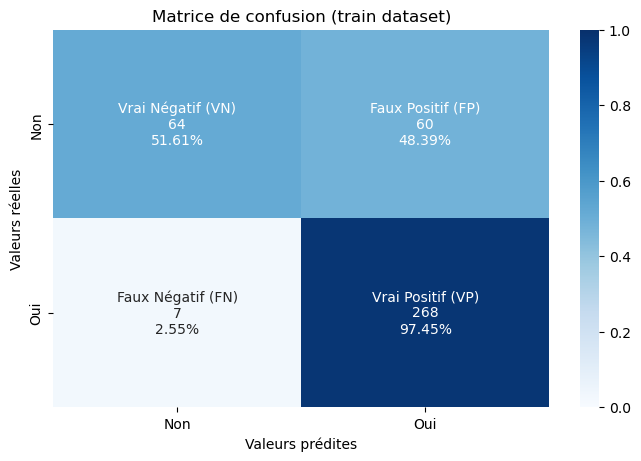

In [27]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_train, y_predict_train, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_predict_train, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (train dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Non', 'Oui'],
            yticklabels=['Non', 'Oui'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

In [28]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66       124
           1       0.82      0.97      0.89       275

    accuracy                           0.83       399
   macro avg       0.86      0.75      0.77       399
weighted avg       0.84      0.83      0.82       399



In [29]:
MLPAcc = accuracy_score(y_predict_train,y_train)
print('MLP accuracy: {:.2f}%'.format(MLPAcc*100))

MLP accuracy: 83.21%


### Il faudrait afficher les courbes de roc (accuracy loss) mais dans le cas du gridsearchcv on ne peut pas les afficher car on n'est pas sur keras, y a pas de history, history que sur keras

## Predict sur le Test

In [30]:
y_predict_test = gridSearchCV.best_estimator_.predict(scaled_X_test)

In [31]:
MLPAcc = accuracy_score(y_test, y_predict_test)
print('MLP accuracy: {:.2f}%'.format(MLPAcc*100))

MLP accuracy: 82.00%


## Matrice de confusion Test

In [32]:
cm = confusion_matrix(y_test, y_predict_test, normalize='true')

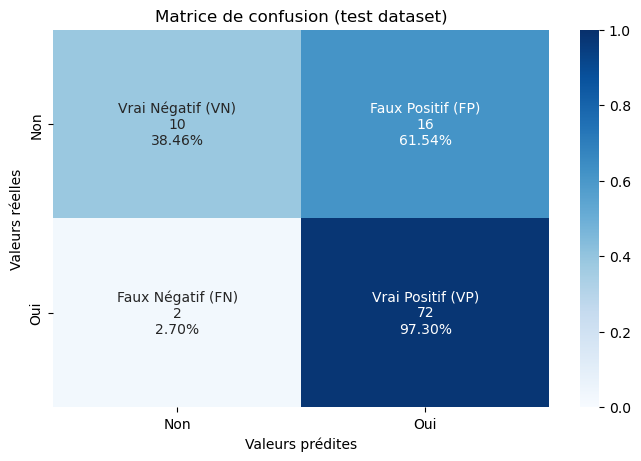

In [33]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_predict_test, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_predict_test, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Non', 'Oui'],
            yticklabels=['Non', 'Oui'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

# GridSearchCV Random Forest

In [34]:
rfc=RandomForestClassifier(random_state=42)

In [35]:
param_grid = { 
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

In [36]:
gridSearchCV2 = GridSearchCV(estimator=rfc, 
                            param_grid=param_grid, 
                            n_jobs=-1,
                            cv= 3 #3 ou 5
                           )
gridSearchCV2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [37]:
gridSearchCV2.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 250}

In [38]:
res = pd.DataFrame(gridSearchCV2.cv_results_).sort_values(by=['rank_test_score'])
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
282,0.569104,0.004082,0.043975,0.000480,entropy,8,sqrt,250,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.819549,0.796992,0.849624,0.822055,0.021560,1
273,0.591157,0.004319,0.043987,0.001241,entropy,8,auto,250,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.819549,0.796992,0.849624,0.822055,0.021560,1
291,0.671932,0.005324,0.053191,0.002860,entropy,8,log2,250,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.819549,0.796992,0.849624,0.822055,0.021560,1
280,0.348283,0.007058,0.027148,0.000041,entropy,8,sqrt,150,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.812030,0.796992,0.857143,0.822055,0.025559,4
289,0.495573,0.040585,0.033300,0.003773,entropy,8,log2,150,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.812030,0.796992,0.857143,0.822055,0.025559,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.563646,0.007868,0.044575,0.000447,gini,10,sqrt,250,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.812030,0.774436,0.842105,0.809524,0.027683,319
156,0.561258,0.007764,0.045327,0.000030,gini,10,log2,250,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.812030,0.774436,0.842105,0.809524,0.027683,319
157,0.676025,0.001601,0.053670,0.002095,gini,10,log2,300,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.812030,0.774436,0.842105,0.809524,0.027683,319
139,0.729874,0.019718,0.054577,0.001205,gini,10,auto,300,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.812030,0.774436,0.842105,0.809524,0.027683,319


In [39]:
print(res.loc[1,['params']])

params    {'criterion': 'gini', 'max_depth': 4, 'max_fea...
Name: 1, dtype: object


## Evaluation des performances du modèle sur le jeu d'apprentissage

In [40]:
y_predict_train2 = gridSearchCV2.best_estimator_.predict(X_train)

## Matrice de confusion Train

In [41]:
cm2 = confusion_matrix(y_train, y_predict_train2, normalize='true')

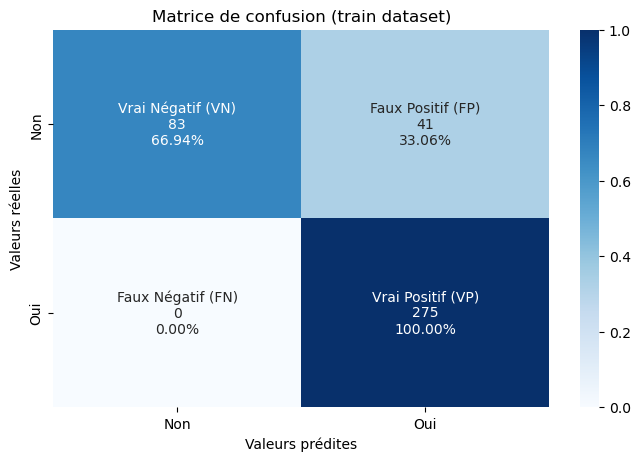

In [42]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_train, y_predict_train2, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_train, y_predict_train2, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm2.shape[0],cm2.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (train dataset)")

sns.heatmap(cm2,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Non', 'Oui'],
            yticklabels=['Non', 'Oui'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

In [43]:
print(classification_report(y_train, y_predict_train2))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       124
           1       0.87      1.00      0.93       275

    accuracy                           0.90       399
   macro avg       0.94      0.83      0.87       399
weighted avg       0.91      0.90      0.89       399



In [44]:
print("Train accuracy for Random Forest on CV data: ",accuracy_score(y_train, y_predict_train2))

Train accuracy for Random Forest on CV data:  0.8972431077694235


In [45]:
MLPAcc = accuracy_score(y_predict_train2,y_train)
print('MLP accuracy: {:.2f}%'.format(MLPAcc*100))

MLP accuracy: 89.72%


## Predict sur le Test

In [46]:
y_predict_test2 = gridSearchCV2.best_estimator_.predict(X_test)

In [47]:
MLPAcc = accuracy_score(y_test, y_predict_test2)
print('MLP accuracy: {:.2f}%'.format(MLPAcc*100))

MLP accuracy: 82.00%


## Matrice de confusion Test

In [48]:
cm2 = confusion_matrix(y_test, y_predict_test2, normalize='true')

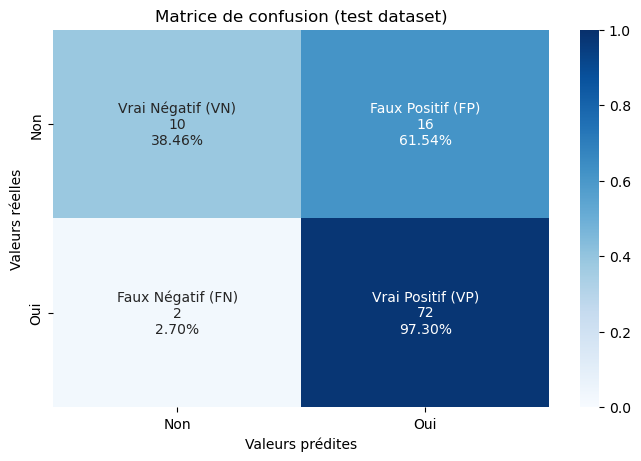

In [49]:
names = ['Vrai Négatif (VN)', 'Faux Positif (FP)','Faux Négatif (FN)', 'Vrai Positif (VP)']
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(y_test, y_predict_test2, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(y_test, y_predict_test2, normalize='true').flatten()]

box_labels = [f"{v1}\n{v2}{v3}" for v1, v2, v3 in zip(names, counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm2.shape[0],cm2.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm2,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=['Non', 'Oui'],
            yticklabels=['Non', 'Oui'])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

# Training model choice

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error

## Logistic Regression

In [51]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.74      1.00      0.85        74

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100

[[ 0 26]
 [ 0 74]]
LR accuracy: 74.00%


## K-Nearest Neighbour (KNN)

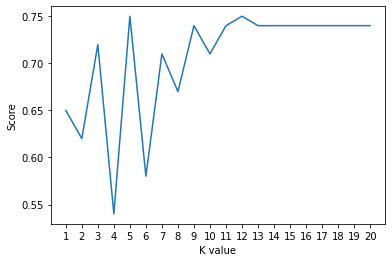

KNN best accuracy: 75.00%


In [52]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(scaled_X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## Support Vector Machine (SVM)

In [53]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(scaled_X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.74      1.00      0.85        74

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100

[[ 0 26]
 [ 0 74]]
SVC accuracy: 74.00%


## Gaussian NB

In [54]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(scaled_X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc*100))

              precision    recall  f1-score   support

           0       0.26      0.42      0.32        26
           1       0.74      0.57      0.64        74

    accuracy                           0.53       100
   macro avg       0.50      0.50      0.48       100
weighted avg       0.61      0.53      0.56       100

[[11 15]
 [32 42]]
Gaussian Naive Bayes accuracy: 53.00%


## Decision Tree

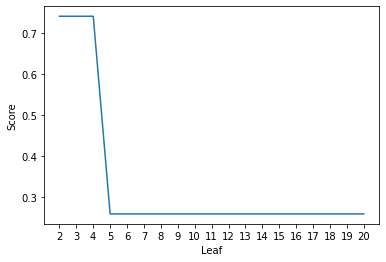

Decision Tree Accuracy: 74.00%


In [55]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(scaled_X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Random Forest

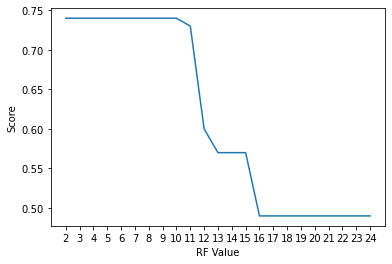

Random Forest Accuracy:  74.00%


In [56]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(scaled_X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## Model Comparaison

In [57]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 
                                  'Gaussian NB', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     NBAcc*100,  DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,75.0
0,Logistic Regression,74.0
2,SVM,74.0
4,Decision Tree,74.0
5,Random Forest,74.0
3,Gaussian NB,53.0


In [58]:
model = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)

In [59]:
model.fit(scaled_X_train, y_train)
model=model.predict(X_test)

# Pickle

- On garde le RandomForestClassifier du GridSearchCV

In [64]:
model_retenu = gridSearchCV2.best_estimator_

In [65]:
import pickle
 
# Save the trained model as a pickle string.
with open('model_Final.pkl', 'wb') as model_file:
    pickle.dump(model_retenu, model_file)

In [62]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
460,1,0,0,1,0,2378,0.0,9.0,360.0,1,3
73,0,1,2,0,0,3273,1820.0,81.0,360.0,1,3
231,0,1,0,1,0,3927,800.0,112.0,360.0,1,2
175,0,1,0,1,0,150,1800.0,135.0,360.0,1,1
237,1,0,0,1,0,4124,0.0,115.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
247,1,0,0,1,0,5000,2541.0,151.0,480.0,1,1
384,0,1,1,1,1,3450,2079.0,162.0,360.0,1,2
19,0,1,0,1,1,9560,0.0,191.0,360.0,1,2
321,0,1,2,1,0,3100,1400.0,113.0,360.0,1,3


In [63]:
test=[[0, 1, 2, 1, 0, 6344443, 4754440, 130, 360, 1, 1]]
#test=model.predict(test)
test=gridSearchCV2.best_estimator_.predict(test)
test

array([1], dtype=int64)